In [1]:
from pendulum_forces import MagneticPendulumInvSpherical, MagneticPendulumXY, MagneticPendulum, Pendulum
from base import get_predefined_system
import numpy as np
import sympy as sp
from scipy.constants import g as g_value

In [2]:
P = MagneticPendulumInvSpherical(6)
# P = MagneticPendulumXY(4)

In [3]:
const1_subs = {
    'm': 1,
    'g': g_value,
    'L': g_value,
    'R': 2,
    'h': 0.5,
    'b': 0.1,   
}
magnet_strength = 10

magnet_polarity_vals = dict((p.name, magnet_strength) for p in P.polarity_list)
constant_subs = const1_subs | magnet_polarity_vals

In [4]:
starting_conditions_sph = np.array([
    constant_subs['L'],
    0.19166740685923828*3/4 * 5,
    np.pi/10,
    0,
    0,
    0
])

# starting_conditions_xy = np.array([
#     1,
#     2.5,
#     -const1_subs['L'],
#     0,
#     0,
#     0
# ])

starting_conditions=starting_conditions_sph
t_max = 100
dt = 0.001

path = P.get_path(starting_conditions, t_max=t_max, dt=dt, **constant_subs)
trajectory = P.path_to_trajectory(path)

In [5]:
from plotting import *
%matplotlib widget

magnet_positions = []
for mag in P.magnet_positions_C:
    mag_pos = [np.float64(mag.dot(base_i).subs(constant_subs)) for base_i in P.coordsystem.C.base_vectors()]
    magnet_positions.append(mag_pos)
magnet_positions

[[2.0, 0.0, -10.30665],
 [1.0, 1.7320508075688772, -10.30665],
 [-1.0, 1.7320508075688772, -10.30665],
 [-2.0, 0.0, -10.30665],
 [-1.0, -1.7320508075688772, -10.30665],
 [1.0, -1.7320508075688772, -10.30665]]

<Axes3D: title={'center': 'Magnetic Pendulum Trajectory'}, xlabel='X', ylabel='Y', zlabel='Z'>

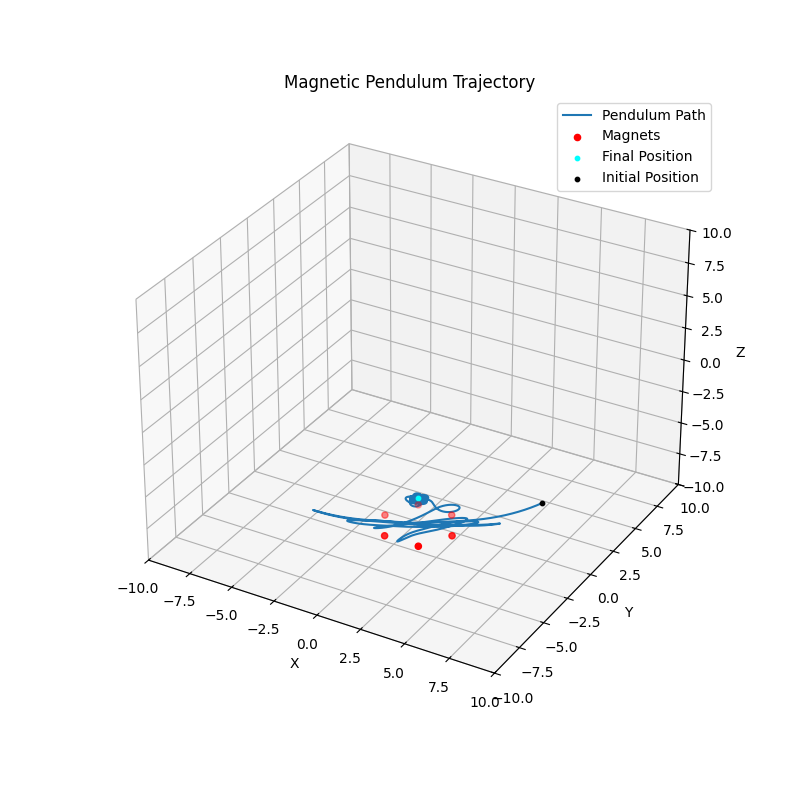

In [6]:
plot_trajectory(trajectory, magnet_positions=magnet_positions, L=10)

#### see energy trends:

just to check we were actually coming to rest etc...

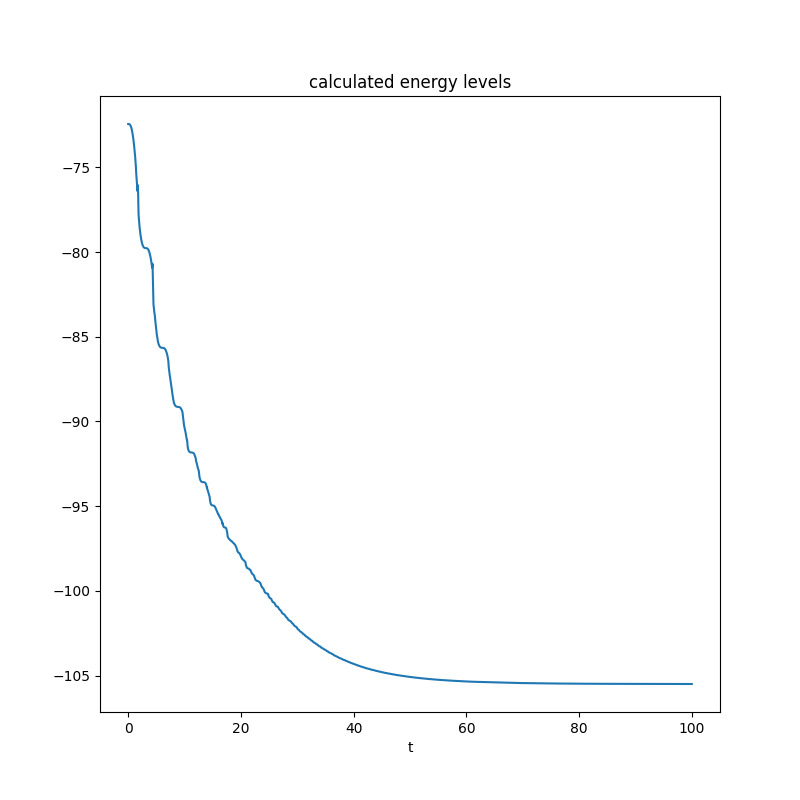

In [7]:
total_energy = sum(P.energy_dict.values()) + P.kinetic_energy()

inputs = list(P.coordsystem.U) + [sp.Derivative(u, P.coordsystem.t) for u in P.coordsystem.U]
f = sp.lambdify(inputs, total_energy.E.subs(constant_subs), modules='numpy')
energy_array = np.array([f(*pos) for pos in path.T])

ax = plt.figure(figsize=(8, 8)).add_subplot()
ax.plot(np.arange(0, t_max, dt), energy_array, label='Calculated Energy', zorder=1)
ax.set_title('calculated energy levels')
ax.set_xlabel('t')
plt.show()